# Kutatási project - Data Science kurzus
### Nagy Kristóf (XA2CLI) / ELTEcon 2019-2020 őszi félév

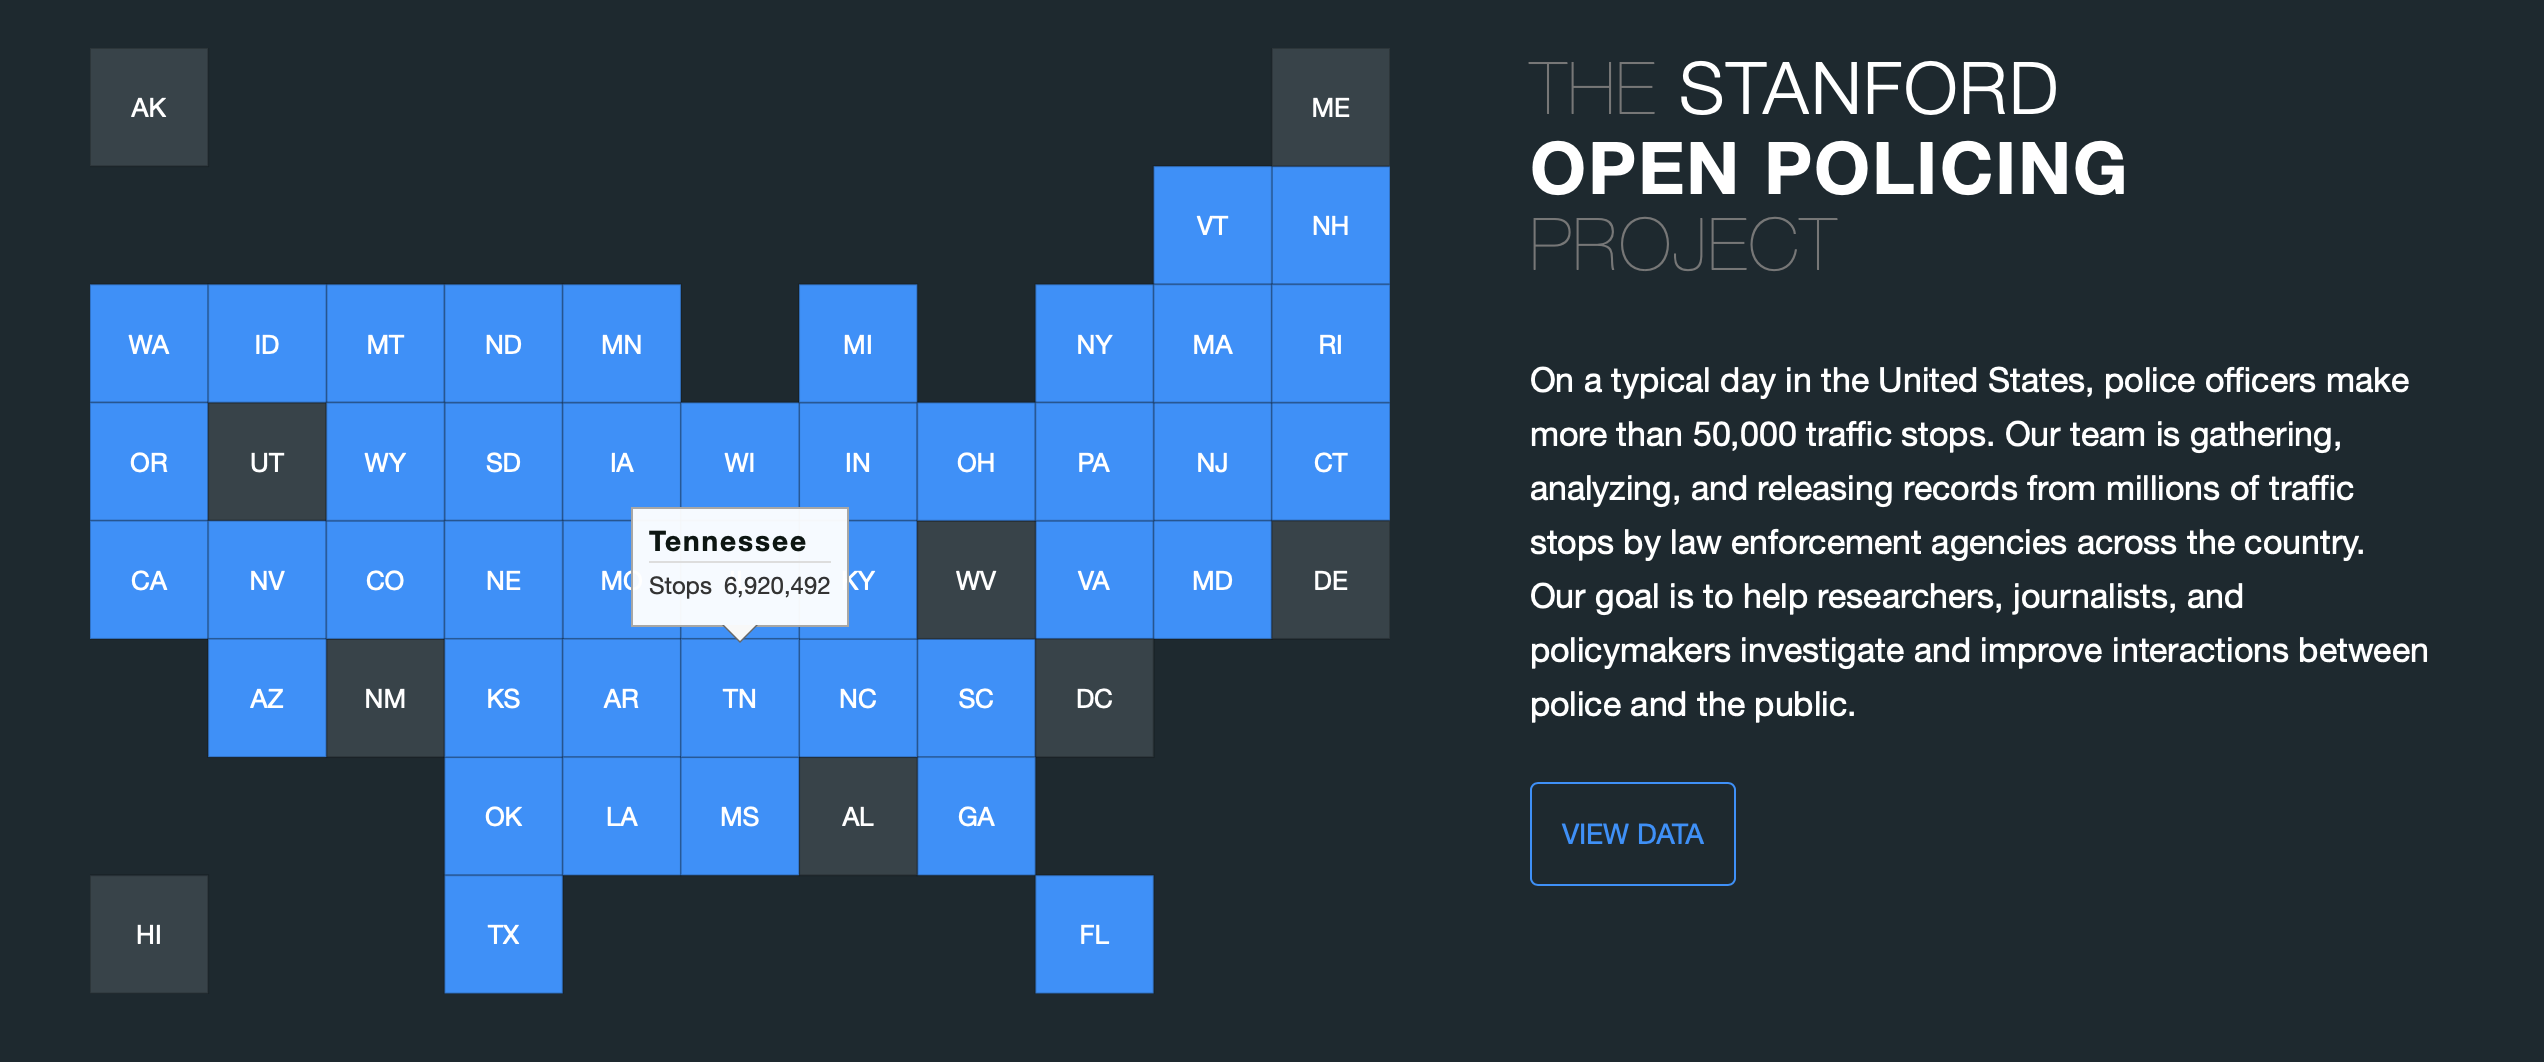

## Témaválasztás: The Stanford Open Policing Project - Tennessee - Nashville

A féléves projektem elkészítéséhez egy ingyenesen elérhető közlekedésrendszészeti adatbázist választottam, amelyet a Stanford Egyetem munkatársai hoztak létre 2015-ben és azta is folyamatosan karbantartanak. Ezen szeretném megvizsgálni, hogy mennyire diszkriminálják az amarikai rendőrök a kisebbségeket, a fehérekkel szemben. Ehhez több okból is szerencsés választásnak tűnik: amerika középső részén helyezkedik el ("rozsdaövezet"), ahol Trump fölényesen nyert, a "black", "police violence", "Nashville" kifejezéseket beírva a Google keresője számtalan alig pár hetes hírt dob ki, valamint sokkal több adat áll a rendelkezésünkre (Jan 2010 - Sep 2016 között 3,092,351 megfigyelés), mint más városokban. 

## Link
### https://openpolicing.stanford.edu/data/

## HF1 - felfedezni az adatbázist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tennessee_nashville_police_data_2010_Jan-2016_Sep.csv')

/Users/kristofnagy/anaconda3/envs/osm_network/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Kaptunk egy figyelmeztetést, hogy egyes változók, nem a legmegfelelőbb adattipusban vannak tárolva. Például gyakori hogy a kétértekű változókat, nem bool-nak olvassa be vagy az timedata datatypeot nem ismeri fel ezeket érdemes átkódolni, mert egyszerűbb lesz vele dolgozni.

In [3]:
df.shape

(3092351, 42)

3.092.351 megfigyelésünk van és 42 változó

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092351 entries, 0 to 3092350
Data columns (total 42 columns):
raw_row_number                    object
date                              object
time                              object
location                          object
lat                               float64
lng                               float64
precinct                          object
reporting_area                    float64
zone                              object
subject_age                       float64
subject_race                      object
subject_sex                       object
officer_id_hash                   object
type                              object
violation                         object
arrest_made                       object
citation_issued                   object
warning_issued                    object
outcome                           object
contraband_found                  object
contraband_drugs                  object
contraband_weapons    

Valóban szinte az összes adatot stringként (object) kezeli.

In [5]:
df.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,...,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3,8891.0,325,25.0,...,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,NaN,N,True,True,False,False,False,False,False


In [6]:
df.tail()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
3092346,2555063,2016-09-09,21:54:00,"44TH AVE N & PARK AVE, NASHVILLE, TN, 37209",36.151159,-86.839514,1,5203.0,113,28.0,...,False,False,N,False,False,False,False,False,False,False
3092347,2555857,2016-09-09,21:55:00,", , ,",NaN,NaN,NaN,NaN,NaN,17.0,...,False,False,N,False,False,False,False,False,False,False
3092348,2554596,2016-09-09,09:56:00,"ANNEX AVE & CAPRI DR, NASHVILLE, TN, 37209",36.147129,-86.888211,1,4675.0,123,67.0,...,False,False,N,False,False,False,False,False,False,False
3092349,2560219,2016-09-09,09:56:00,"DICKERSON PIKE & GATEWOOD AVE, NASHVILLE, TN, ...",36.200178,-86.769899,2,1863.0,223,18.0,...,True,False,H,False,False,False,False,False,False,False
3092350,2555099,2016-09-09,21:57:00,"BELL CREST DR & BELL RD, ANTIOCH, , 37013",36.063321,-86.637409,NaN,NaN,NaN,43.0,...,True,False,N,False,False,False,False,False,False,False


Megnézük melyik oszlopban hány darab missing érték van

In [7]:
df.isnull().sum() 

raw_row_number                          0
date                                    0
time                                 5467
location                                0
lat                                187106
lng                                187106
precinct                           390222
reporting_area                     332393
zone                               390222
subject_age                           839
subject_race                         1850
subject_sex                         12822
officer_id_hash                        11
type                                    0
violation                            8020
arrest_made                            28
citation_issued                       320
warning_issued                        337
outcome                              1935
contraband_found                  2964646
contraband_drugs                  2964646
contraband_weapons                2964646
frisk_performed                        22
search_conducted                  

Az dátum és az időpont elengedhetetlen lesz az elemzésünkben így az itteni missingeket ki kell dobnunk, de ez az 5467 megfigyelés a 3 milliós adat bázishoz épest eltörpül.

In [8]:
df.dropna(subset=['date', 'time'], inplace=True)

Az életkort, a raszot és a nem változókat kicsit közelebről is érdemes megvizsgálni, mert ezek az elemzés legfontosabb adatai.

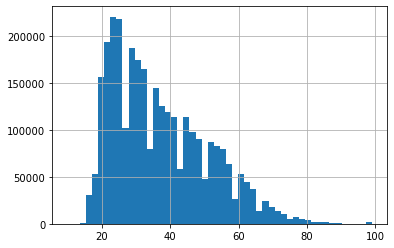

In [9]:
df.subject_age.hist(bins=50)
plt.show()

Amerikában 16 éves kortól lehet vezetni, így az ettől fiatalabb elkövető gyanús, persze egy kis százalék még nem jelent adathibát, mert elképzelhető, hogy 14 évesek elkötnek egy kocsit...

In [10]:
df[df.subject_age < 16].subject_age.count()

1062

In [11]:
round(df.subject_race.value_counts(normalize=True,dropna=False),2)

white                     0.54
black                     0.38
hispanic                  0.05
asian/pacific islander    0.01
unknown                   0.01
other                     0.00
NaN                       0.00
Name: subject_race, dtype: float64

In [12]:
round(df.subject_sex.value_counts(normalize=True,dropna=False),2)

male      0.59
female    0.41
NaN       0.00
Name: subject_sex, dtype: float64

Kódoljuk át a nemet egy kategórikus változóvá:

In [13]:
df["subject_sex"] = df["subject_sex"].astype('category')

In [14]:
df.subject_sex.dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)